In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the data

In [3]:
usa = pd.read_csv('Onyx Data (USA Date Format).csv')

In [4]:
usa.head(10)

,Country,Month,Total Passengers
0,United Kingdom,1/6/2021,169607
1,Panama,1/6/2021,228568
2,Japan,1/6/2021,71990
3,Chile,1/6/2021,13210
4,Germany,1/6/2021,250995
5,United Arab Emirates,1/6/2021,97679
6,Iceland,1/6/2021,56189
7,New Zealand,1/6/2021,2641
8,South Korea,1/6/2021,87492
9,Spain,1/6/2021,62559


In [5]:
usa.tail(10)

,Country,Month,Total Passengers
17207,Chile,1/1/1990,13170
17208,Atlantic Ocean,1/1/1990,37756
17209,Guatemala,1/1/1990,47474
17210,Brazil,1/1/1990,113016
17211,Netherlands,1/1/1990,94417
17212,Peru,1/1/1990,36498
17213,Panama,1/1/1990,14813
17214,Canada,1/1/1990,822111
17215,Venezuela,1/1/1990,78578
17216,Aruba,1/1/1990,33395


In [ ]:
# diving the date to year, month, day and day-name

In [6]:
usa['Play_Time'] = pd.to_datetime(usa['Month'])

In [7]:
usa.head()

,Country,Month,Total Passengers,Play_Time
0,United Kingdom,1/6/2021,169607,2021-01-06
1,Panama,1/6/2021,228568,2021-01-06
2,Japan,1/6/2021,71990,2021-01-06
3,Chile,1/6/2021,13210,2021-01-06
4,Germany,1/6/2021,250995,2021-01-06


In [8]:
usa['year'] = pd.DatetimeIndex(usa['Play_Time']).year
usa['month'] = pd.DatetimeIndex(usa['Play_Time']).month
usa['day'] = pd.DatetimeIndex(usa['Play_Time']).day
usa['weekday'] = pd.DatetimeIndex(usa['Play_Time']).weekday
usa['day-name'] = usa['Play_Time'].apply(lambda x: x.day_name())
usa['month-name'] = usa['Play_Time'].apply(lambda x: x.month_name())

In [9]:
usa.head()

,Country,Month,Total Passengers,Play_Time,year,month,day,weekday,day-name,month-name
0,United Kingdom,1/6/2021,169607,2021-01-06,2021,1,6,2,Wednesday,January
1,Panama,1/6/2021,228568,2021-01-06,2021,1,6,2,Wednesday,January
2,Japan,1/6/2021,71990,2021-01-06,2021,1,6,2,Wednesday,January
3,Chile,1/6/2021,13210,2021-01-06,2021,1,6,2,Wednesday,January
4,Germany,1/6/2021,250995,2021-01-06,2021,1,6,2,Wednesday,January


In [10]:
usa.tail()

,Country,Month,Total Passengers,Play_Time,year,month,day,weekday,day-name,month-name
17212,Peru,1/1/1990,36498,1990-01-01,1990,1,1,0,Monday,January
17213,Panama,1/1/1990,14813,1990-01-01,1990,1,1,0,Monday,January
17214,Canada,1/1/1990,822111,1990-01-01,1990,1,1,0,Monday,January
17215,Venezuela,1/1/1990,78578,1990-01-01,1990,1,1,0,Monday,January
17216,Aruba,1/1/1990,33395,1990-01-01,1990,1,1,0,Monday,January


In [ ]:
#removing the month time hour and month column

In [ ]:
usa.drop(columns=['Month', 'time', 'hour', 'month'], inplace = True)

In [11]:
usa.head()

,Country,Month,Total Passengers,Play_Time,year,month,day,weekday,day-name,month-name
0,United Kingdom,1/6/2021,169607,2021-01-06,2021,1,6,2,Wednesday,January
1,Panama,1/6/2021,228568,2021-01-06,2021,1,6,2,Wednesday,January
2,Japan,1/6/2021,71990,2021-01-06,2021,1,6,2,Wednesday,January
3,Chile,1/6/2021,13210,2021-01-06,2021,1,6,2,Wednesday,January
4,Germany,1/6/2021,250995,2021-01-06,2021,1,6,2,Wednesday,January


In [ ]:
# country travelled to the most

In [12]:
top_10_country = usa.groupby(['Country'])[['Total Passengers']].sum().sort_values(by='Total Passengers', ascending = False)
top_10_country.head(10)

,Total Passengers
Country,
Canada,600780824
Mexico,523517834
United Kingdom,472726270
Japan,360191482
Germany,244300830
France,171868359
Netherlands,124704639
Dominican Republic,119715516
South Korea,108337164


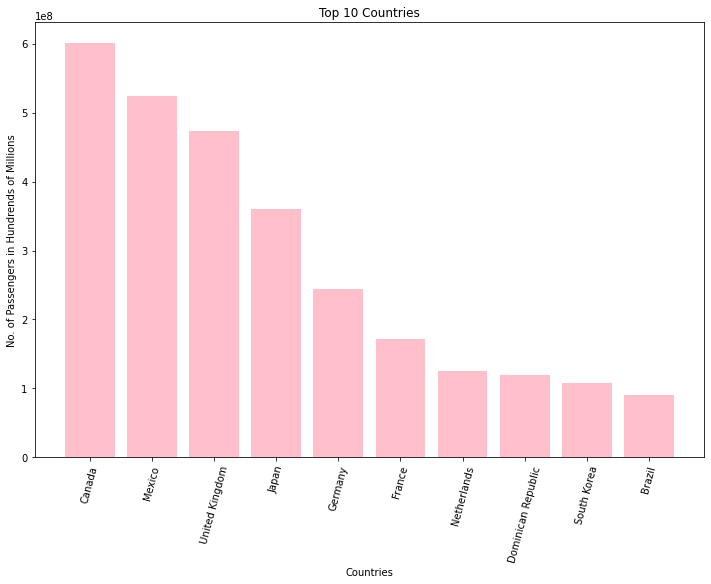

In [13]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_10_country.head(10).index,top_10_country["Total Passengers"].head(10),color='pink')
ax.set(title="Top 10 Countries",xlabel="Countries",ylabel="No. of Passengers in Hundrends of Millions");
plt.xticks(rotation=75);

In [ ]:
# lesst country travelled to

In [14]:
least_10_countries = usa.groupby(['Country'])[['Total Passengers']].sum().sort_values(by='Total Passengers', ascending = False)
least_10_countries.tail(10)

,Total Passengers
Country,
Philippines,22178076
Atlantic Ocean,21447345
Turkey,20693963
Cayman Islands,20373325
Denmark,19557969
Iceland,18874301
Honduras,18292077
Chile,18210011
Trinidad and Tobago,17671659


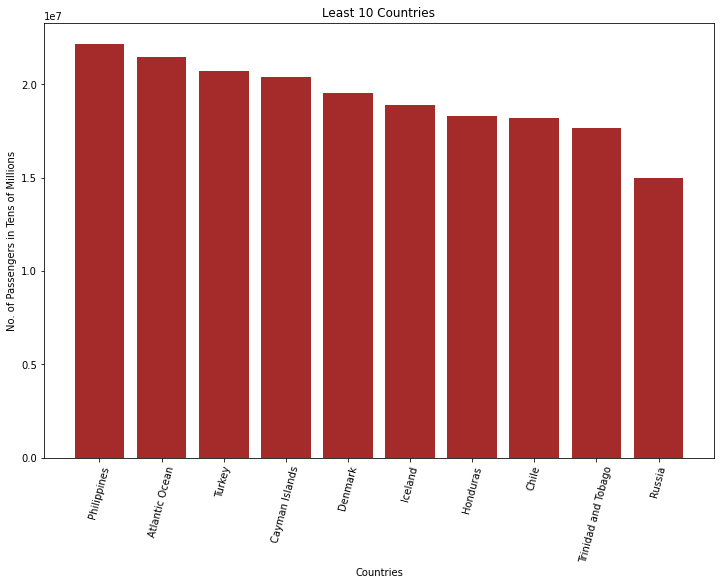

In [15]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(least_10_countries.tail(10).index,least_10_countries["Total Passengers"].tail(10),color='brown')
ax.set(title="Least 10 Countries",xlabel="Countries",ylabel="No. of Passengers in Tens of Millions");
plt.xticks(rotation=75);

In [ ]:
# highest month

In [16]:
highest_month = usa.groupby(['month-name'])[['Total Passengers']].sum().sort_values(by='Total Passengers', ascending = False)
highest_month.head()

,Total Passengers
month-name,
January,4189253119


In [ ]:
# highest day travelled

In [26]:
highest_day = usa.groupby(['day-name'])[['Total Passengers']].sum().sort_values(by='Total Passengers', ascending = False)
highest_day.head()

,Total Passengers
day-name,
Thursday,613213760
Wednesday,612769715
Friday,602145118
Tuesday,599600507
Monday,590038235


<AxesSubplot:xlabel='day-name', ylabel='Total Passengers'>

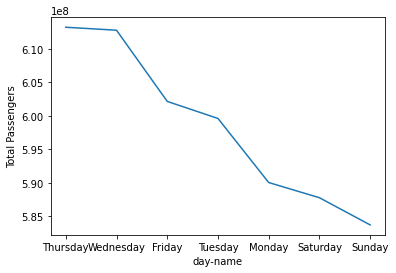

In [31]:
sns.lineplot(data = highest_day, x= 'day-name', y= 'Total Passengers')

In [ ]:
# year with the most passengers

In [32]:
year = usa.groupby(['year'])[['Total Passengers']].sum().sort_values(by='Total Passengers', ascending = False)
year.head(10)

,Total Passengers
year,
2019,223595024
2018,219767977
2017,208374105
2016,199237334
2015,189302951
2014,178288339
2013,169739360
2012,161057273
2011,153804631


<AxesSubplot:xlabel='year', ylabel='Total Passengers'>

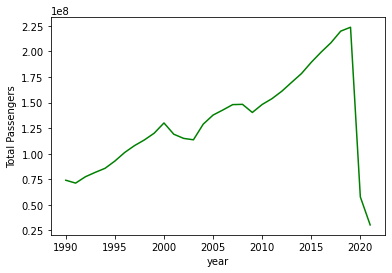

In [34]:
sns.lineplot(data = year, x = 'year', y = 'Total Passengers', color = 'green')